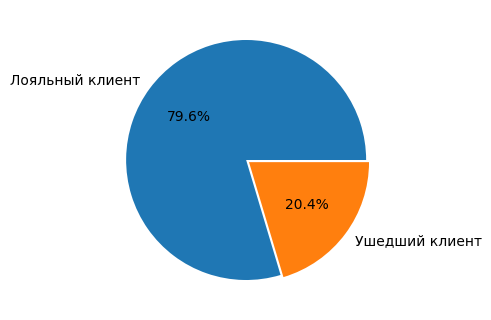

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


"""Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)"""

original_data=pd.read_csv('churn.csv')

data=original_data.copy() #копия для сохранности
grouped_data=data.groupby( #группируем по статусу EXITED
    by='Exited',
    as_index=False
).count()
grouped_data=grouped_data.iloc[:,:2] #отсекаем лишнее

grouped_data['Exited']=grouped_data['Exited'].astype('category') #чтоб график был лучше читаем, 
grouped_data['Exited']=grouped_data['Exited'].cat.rename_categories( #переименовываем значения
    {0:'Лояльный клиент',
    1:'Ушедший клиент'}
)
#display(grouped_data)

fig=plt.figure(figsize=(3,3))
axes=fig.add_axes([0,0,1,1])
axes.pie(
    grouped_data['RowNumber'],
    labels=grouped_data['Exited'],
    autopct='%.1f%%',
    explode=[0.0,0.03]
);


Из всех клиентов банка закрыл свой счет каждый пятый клиент, что плохо.
Будем анализировать

In [114]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
# Опишите распределение и сделайте выводы.
mask_1=data['Balance']>2500 #фильтр
need_data=data[mask_1]
need_data=need_data.loc[:,['Balance','Exited']] #убираем лишнее

px.histogram(
    data_frame=need_data,
    x='Balance',

    nbins=50,
    height=500,
    width=1200,
)


Основная часть клиентов - это обладатели баланса от 80 000 до 170 000. Вывод: неплохо ребята живут, а значит банк работает, в основном с премиальными клиентами

In [115]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
data
mask_1=data['Balance']>2500 #фильтр
need_data=data[mask_1]


px.histogram(
    data_frame=need_data,
    x='Balance',
    facet_col='Exited',
    nbins=50,
    height=500,
    width=1200,
)

###### Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
###### Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Основная часть ушедших клиентов - это обладатели баланса от 80 000 до 170 000. Необходимо предпринять меры, например улучшить условия обслуживания, либо замаслить подарками. Я короч не маркетолог

In [116]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов?
# На какую возрастную категорию клиентов стоит обратить внимание банку?
exit_data=need_data[need_data['Exited']==1]

px.histogram(
    data_frame=exit_data,
    x='Age',
    
    nbins=50,
    height=400,
    width=800,
    title='Распределение возраста в разрезе признака оттока'
)


###### В какой группе больше потенциальных выбросов?
###### На какую возрастную категорию клиентов стоит обратить внимание банку?
Клиенты 32-57 лет чаще остальных принимают решение не быть клиентами банка

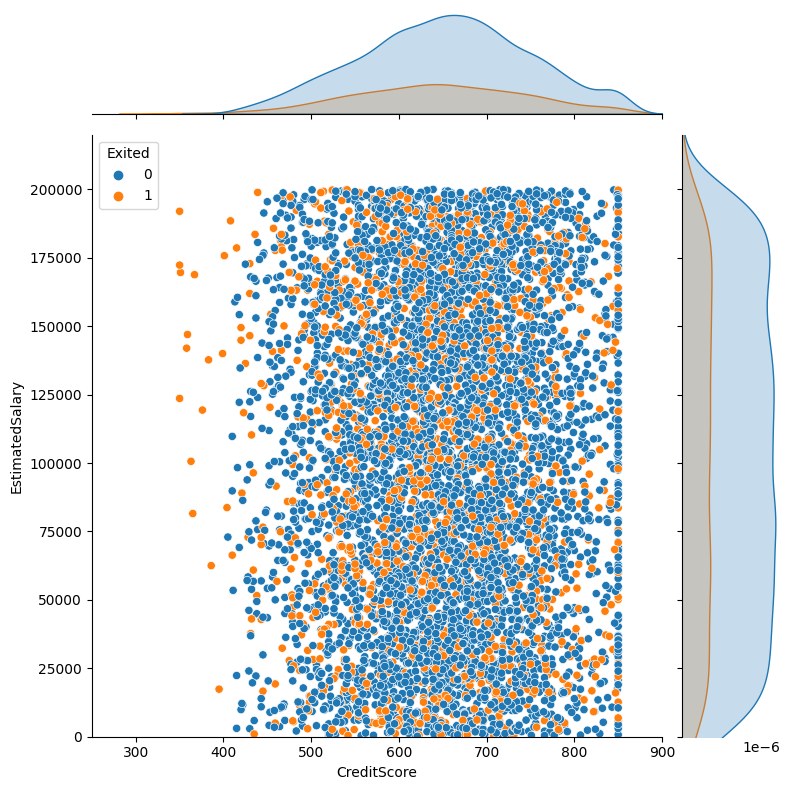

In [117]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга(CreditScore) клиента и его предполагаемой зарплаты(EstimatedSalary). 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками?
# Если не видите явной взаимосвязи, укажите это.
need_data
jointplot=sns.jointplot(
    data=need_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    xlim=(250,900),
    ylim=(0,220000),
    height=8
    
);


###### Какова взаимосвязь между признаками?
###### Если не видите явной взаимосвязи, укажите это.
Так, единственное, что думаю, что вижу:
Самые низкие рейтинги (CreditScore<400) у ушедших клиентов и предполагаемые зарплаты у обладателей звания 'CreditScore<400' довольно высоки.
Учитывая, что предполагаемая ЗП высокая,  а кредитная история мала, могу предположить, что кто-то заврался в банке о своей реальной заработной плате

По взаимосвязи:синие кружочки съедают желтые кружочки, остальной взаимосвязи не вижу

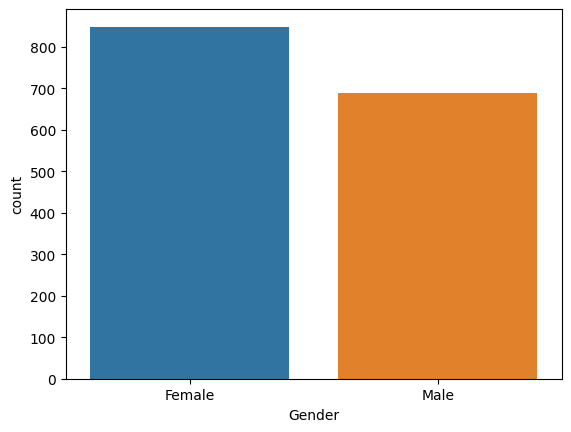

In [118]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
countplot=sns.countplot( #а countplot в учебе не было, походу самое веселое еще впереди
    exit_data,
    x='Gender'
)

In [119]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг(NumOfProducts)?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
#Зависимость оттока от приобретенных услуг
bar_data=exit_data.groupby('NumOfProducts', as_index=False)['Exited'].count()

fig=px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='Exited',
    color='Exited',
    
)
fig.show()

In [120]:
#9.8. Как влияет наличие статуса активного клиента (IsActiveMember) на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
bar_data2=exit_data.groupby('IsActiveMember',as_index=False)['Exited'].count()

fig=px.bar(
    data_frame=bar_data2,
    x='IsActiveMember',
    y='Exited',
    color='Exited',
    title='Влияние статуса активного клиента на отток клиентов'
)
fig.show()

###### Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
Для уменьшения оттока клиентов рекомендую увеличить количество доп.услуг, чтоб максимально зацепить клиента, что в дальнейшем также сделает его активным клиентом

In [126]:
#9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
grouped_data=exit_data.groupby('Geography')['Exited'].count()
#display(grouped_data)

new_df=pd.DataFrame({'countries':['France','Germany','Spain'],
                     'Ушедший клиент':[473,814,250]})
#display(new_df)

fig=px.choropleth(
    data_frame=new_df,
    locations='countries',
    locationmode='country names',
    color='Ушедший клиент',
    range_color=[0,900],
    
      
)
fig.show()

###### 9.9. В какой стране доля ушедших клиентов больше? 
###### Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
###### Предположите, с чем это может быть связано.
Больше всего ушедших клиентов в Германии

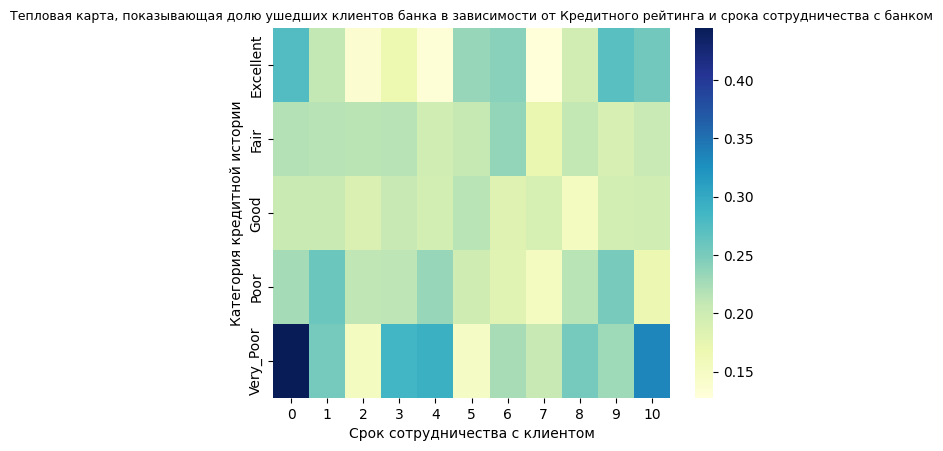

In [165]:
#9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
from code_for_exam import get_credit_score_cat

data['CreditScore']=data['CreditScore'].astype('category')
data['CreditScoreCat']=data['CreditScore'].apply(get_credit_score_cat)
data

#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, 
# в течение которых клиент пользуется услугами банка (Tenure).
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
grouped_data=data.groupby(['CreditScoreCat','Tenure'])['Exited'].mean().unstack()
grouped_data.columns=grouped_data.columns.astype('string')
#display(grouped_data)
#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
heatmap=sns.heatmap(
    data=grouped_data,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта, показывающая долю ушедших клиентов банка в зависимости от Кредитного рейтинга и срока сотрудничества с банком',
                  fontsize=9)
heatmap.set_xlabel('Срок сотрудничества с клиентом')
heatmap.set_ylabel('Категория кредитной истории');

#Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

###### Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Чаще всего уходят самые бедные и только начавшие сотрудничество люди